Notebook elaborado para apresentar o conceito de problema direto.
Criado para a disciplina Geofísica I da Universidade Federal de Uberlândia.
O uso e a reprodução são livres para fins educacionais, pede-se apenas a citação da fonte.

[![License: GPL v3](https://img.shields.io/badge/License-GPLv3-blue.svg)](https://www.gnu.org/licenses/gpl-3.0)

Prof. Dr. Emerson Rodrigo Almeida<br>
Universidade Federal de Uberlândia<br>
Instituto de Geografia - Curso de Geologia<br>
emerson.almeida@ufu.br<br>

<p>&nbsp;</p>
Última modificação: 05/03/2021

# Instruções iniciais

Neste notebook você irá aprender os conceitos relacionados à solução de um problema direto e à estimativa de parâmetros de um modelo utilizando um conceito simples que certamente você já conhece. Para isto leia atentamente as instruções apresentadas antes de cada célula e execute-as uma a uma, para acompanhar o processo corretamente.

Não se preocupe em compreender o código em si, não é obrigatório que você conheça a programação para obter e interpretar os resultados da demonstração. Mesmo assim, sinta-se livre caso queira perguntar qualquer coisa para aprender mais sobre o código e sua elaboração.

<p>&nbsp;</p>

### Passo 01 - Preparação

Primeiramente vamos preparar o notebook com os módulos e funções que precisaremos no decorrer da demonstração. A célula abaixo contém as funções utilizadas nos cálculos e as funções utilizadas para gerar as figuras. Execute-a uma vez antes de executar qualquer outra parte do código e **não altere nada no código apresentado na célula** para não criar problemas na execução do código.

Você pode executar o código na célula clicando sobre ela e em seguida clicando no botão **RUN** na barra do Jupyter Notebook ou pressionando as teclas **SHIFT+ENTER** no seu teclado.

<p>&nbsp;</p>

**Importante!** Nem todas as células irão retornar algum tipo de mensagem ou figura após a execução. Isto é normal e não significa que a execução tenha falhado. Perceba o símbolo **In [   ]:** próximo ao canto superior esquerdo de cada célula. Ao iniciar a execução de uma delas você verá um asterisco ($*$) aparecer dentro dos colchetes. Você saberá que a execução ocorreu sem problemas quando o $*$ dentro dos colchetes for substituído por um número e nenhuma mensagem de erro aparecer abaixo da célula executada. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
#from sklearn.metrics import mean_squared_error
#rms = sqrt(mean_squared_error(y_actual, y_predicted))

def fwd(t, g, s0=0, v0=0):
    return s0 + v0*t + 0.5*g*t**2


def fwd_esfera(rho, rho_bg, R, z, x):
    return 27.9e-3 * (rho - rho_bg) * R**3 *  z / ((x**2 + z**2)**(3/2))
    

def d_observ(tt, d_obs):
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(tt, d_obs, 'ob')
    ax.invert_yaxis()
    ax.set_title('Dados observados', fontsize=14)
    ax.set_xlabel('Tempo (s)', fontsize=14)
    ax.set_ylabel('Posição (m)', fontsize=14)
    ax.grid(which='both')
    plt.show()


def d_observ_bf(tt, d_obs):
    
    fig, ax = plt.subplots(figsize=(15,4))
    ax.plot(tt, d_obs, 'ob')
    ax.invert_yaxis()
    ax.set_title('Dados observados', fontsize=14)
    ax.set_xlabel('Distância (m)', fontsize=14)
    ax.set_ylabel('Medida (U)', fontsize=14)
    ax.grid(which='both')
    ax.invert_yaxis()
    plt.show()
    

def ajuste_bf(xx, d_pred, d_obs):

    err_rms_pc = np.round(np.sqrt(np.mean(((d_obs - d_pred) / d_obs)**2, axis=0)) * 100, 2)
    
    fig, ax = plt.subplots(figsize=(15,4))
    ax.plot(xx, d_obs, 'ob', label='dados observados')
    ax.plot(xx, d_pred, '-r', label='dados preditos')
    ax.set_title('Erro RMS = '+ str(err_rms_pc) + ' %', fontsize=14)
    ax.set_xlabel('Distância (m)', fontsize=14)
    ax.set_ylabel('Medida (U)', fontsize=14)
    ax.grid(which='both')
    ax.legend()
    plt.show()
    
    
    
    
def ajuste(tt, d_pred, d_obs):

    epsilon = 1e-6  # para evitar divisão por zero
    
    err_rms_pc = np.round(np.sqrt(np.mean((((d_obs+epsilon) - (d_pred+epsilon)) / (d_obs+epsilon))**2, axis=0)) * 100, 2)
    
    fig, ax = plt.subplots(figsize=(6,4))
    ax.plot(tt, d_obs, 'ob', label='dados observados')
    ax.plot(tt, d_pred, '-r', label='dados preditos')
    ax.invert_yaxis()
    ax.set_title('Erro RMS = '+ str(err_rms_pc) + ' %', fontsize=14)
    ax.set_xlabel('Tempo (s)', fontsize=14)
    ax.set_ylabel('Posição (m)', fontsize=14)
    ax.grid(which='both')
    ax.legend()
    plt.show()
    
t = np.linspace(0, 5, 11)
s_o = np.array(list(map(lambda x: 0.5*9.8*x**2, t)))

s_o2 = np.array([[0.000000000000000000e+00, 1.653999999999999915e+00],
                 [5.000000000000000000e-01, 3.487249999999999961e+00],
                 [1.000000000000000000e+00, 6.247999999999999332e+00],
                 [1.500000000000000000e+00, 9.936249999999999361e+00],
                 [2.000000000000000000e+00, 1.455199999999999960e+01],
                 [2.500000000000000000e+00, 2.009525000000000006e+01],
                 [3.000000000000000000e+00, 2.656599999999999895e+01],
                 [3.500000000000000000e+00, 3.396424999999999983e+01],
                 [4.000000000000000000e+00, 4.228999999999999915e+01],
                 [4.500000000000000000e+00, 5.154325000000000045e+01],
                 [5.000000000000000000e+00, 6.172400000000000375e+01]])

bf_obs = np.array([3.03572027e-05, 3.42160388e-05, 3.87527057e-05, 4.41215728e-05,
                   5.05207954e-05, 5.82073599e-05, 6.75182668e-05, 7.89007722e-05,
                   9.29562188e-05, 1.10504592e-04, 1.32681254e-04, 1.61084576e-04,
                   1.98005689e-04, 2.46793366e-04, 3.12445717e-04, 4.02589480e-04,
                   5.29130633e-04, 7.11071166e-04, 9.79309520e-04, 1.38454779e-03,
                   2.00880000e-03, 2.97535720e-03, 4.42809752e-03, 6.38866273e-03,
                   8.38940503e-03, 9.30000000e-03, 8.38940503e-03, 6.38866273e-03,
                   4.42809752e-03, 2.97535720e-03, 2.00880000e-03, 1.38454779e-03,
                   9.79309520e-04, 7.11071166e-04, 5.29130633e-04, 4.02589480e-04,
                   3.12445717e-04, 2.46793366e-04, 1.98005689e-04, 1.61084576e-04,
                   1.32681254e-04, 1.10504592e-04, 9.29562188e-05, 7.89007722e-05,
                   6.75182668e-05, 5.82073599e-05, 5.05207954e-05, 4.41215728e-05,
                   3.87527057e-05, 3.42160388e-05, 3.03572027e-05])

x = np.linspace(-200, 200, 51)

### Passo 02 - Dados Observados

Os dados preditos correspondem a aqueles coletados em campo. Considere o seguinte exemplo: uma aquisição de dados que corresponde à observação de um corpo em queda livre a partir de uma posição de repouso, em que a cada 0.5 segundo é anotada a distância deste corpo em relação à sua posição inicial. Os dados observados correspondem ao conjunto de posições anotadas a cada intervalo de tempo. 

Execute a célula abaixo para gerar uma representação gráfica destes dados.

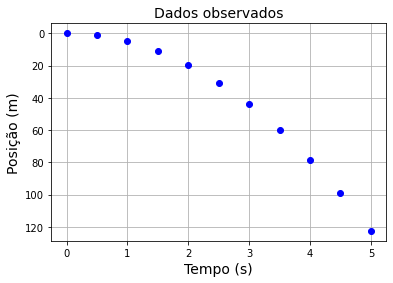

In [2]:
d_observ(t, s_o)

Digamos que você queira utilizar estes dados para estimar a aceleração que este corpo apresenta durante sua trajetória. Para isto você precisa de uma equação que defina o comportamento de queda deste corpo. Esta equação será o seu **problema direto**, onde são consideradas as questões relacionadas à física do problema e onde você pode simular o comportamento fornecendo os **parâmetros do modelo** que deseja. Há uma equação que já é sua conhecida e que você pode aplicar nesta situação:

$$ s = s_i + v_i * t + 0.5 * a * t^2 $$

em que $s_f$ é a posição do corpo após um tempo $t$, $s_i$ é a posição inicial do corpo, $v_i$ é a sua velocidade inicial e $a$ é a sua aceleração, que é exatamente o que você quer estimar. É claro que você deve estar pensando: "*Basta reorganizar os termos da equação isolando a do lado esquerdo e calculá-lo a partir de um tempo t em que a posição do corpo foi observada*". Você tem razão, é possível e muito mais inteligente adotar este procedimento *para este exemplo*, por que o problema apresentado é definido como linear (i.e., os dados relacionam-se linearmente aos parâmetros) e bem-posto (admite solução única). Este exemplo foi colocado aqui para que você possa trabalhar com um conceito que já lhe seja familiar. De qualquer maneira, ao pensar desta maneira você intuitivamente considerou o problema em sua **forma inversa**, onde você tenta estimar o parâmetro ($a$) a partir dos dados observados ($s$).

### Passo 03 - Dados Preditos

Então você tem os dados observados e uma equação que define o comportamento do corpo em queda livre. De posse destas informações, você pode estimar a aceleração do corpo através de uma **modelagem**: você irá fornecer valores de aceleração que considera plausíveis, irá calcular as posições correspondentes a esta aceleração de acordo com a equação da queda livre do corpo, e irá verificar se os valores calculados são próximos aos valores de posição que você observou. Estes dados calculados na modelagem correspondem aos **dados preditos**, e sua correspondência em relação aos dados observados será quantificada através de um **erro de ajuste**. Neste exemplo usaremos a medida de erro RMS (root mean square), dada por:

$$ ERR = \sqrt{\frac{\sum_{i=1}^{N}(do_{i} - dp_{i})^2}{N}} $$

ou, percentualmente, por:

$$ ERR(\%) = \sqrt{\frac{\sum_{i=1}^{N}(\frac{do_{i} - dp_{i}}{do_{i}})^2}{N}} * 100 $$

onde $dp$ são os dados preditos e $do$ são os dados observados. Assim, na célula abaixo escreva um valor numérico para a variável $a$ diferente de zero e, em seguida, execute a célula para obter um conjunto de dados preditos (ou modelados) e verificar se eles se ajustam aos dados observados.

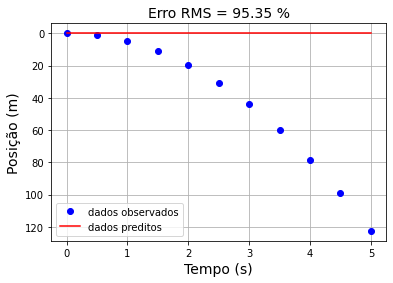

In [3]:
a = 0.0              # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 

s_pred = fwd(t, a)
ajuste(t, s_pred, s_o)

Se você fez uma estimativa correta logo na primeira tentativa parabéns, você conseguiu modelar a aceleração do corpo. Se não conseguiu, você pode tentar novamente até conseguir estimar melhor este valor. Este processo de tentativa e erro que você fez é a **modelagem**.

Este procedimento torna-se mais complexo quando você aumenta o número de variáveis que influenciam os seus dados observados. Tome o mesmo exemplo acima, mas considere agora que o corpo não partiu do repouso (i.e., $v_0 \neq 0$) e de uma posição $s_0 \neq 0$. Execute a célula abaixo para modelar uma nova curva de dados envolvendo o mesmo problema, porém agora você precisará fornecer valores de $v_0$ e $s_0$ também.

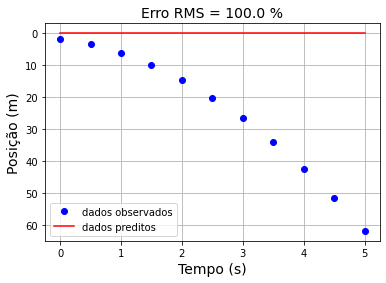

In [4]:
a = 0.0           # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 
v0 = 0.0          # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 
s0 = 0.0          # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 


s_pred2 = fwd(t, a, v0=v0, s0=s0)
ajuste(t, s_pred2, s_o2[:,1])

Pode ter sido um pouco mais complicado desta vez, mas é provável que você ainda tenha conseguido encontrar os valores corretos, porque o problema continua admitindo uma solução única. Em Geofísica os problemas dificilmente podem ser considerados lineares e/ou bem-postos, o que torna sua abordagem muito mais complexa.

### Passo 04 - Problema não linear

Considere agora um problema geofísico. Vamos usar a formulação de problema direto de um método geofísico real, porém o que nos interessa aqui é o conceito relacionado à modelagem e não o método em si. Então, vamos supor que trata-se de um método geofísico genérico que chamaremos de QLQR. Este método permite obter dados em função da densidade de um corpo geológico, da densidade da rocha ao redor deste corpo, da profundidade do corpo e do seu tamanho. A grandeza física medida é dada simplesmente em Unidades (U).

Execute a célula abaixo para visualizar uma curva de medidas adquirida em um levantamento de campo.

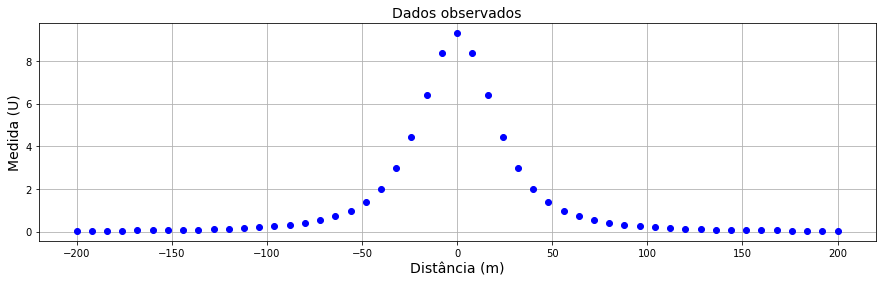

In [5]:
d_observ_bf(x, bf_obs*1e3)

Tente modelar este dado fornecendo os valores de densidade do corpo rochoso ($rho\_c$) e da rocha encaixante ($rho\_r$), bem como a profundidade ($prof$) do centro deste corpo e o seu tamanho aproximado (considere um corpo esférico de raio $raio$). Faça isso estimando os valores para cada variável e executando a célula abaixo:

C:\Users\Emerson\Anaconda3\envs\demoaulasnb\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


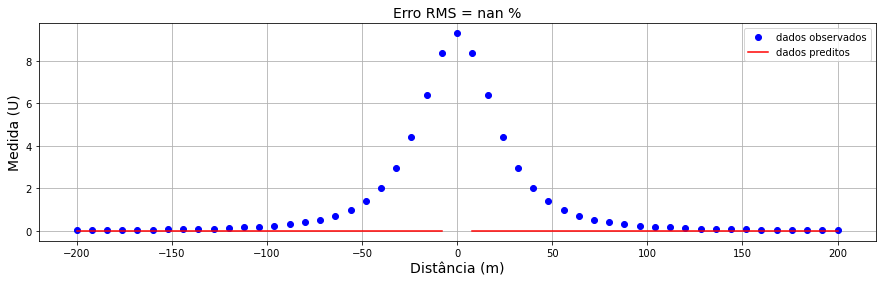

In [6]:
rho_c = 0.0           # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 
rho_r = 0.0           # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 
raio = 0.0            # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 
prof = 0.0            # <--------------- insira sua estimativa nesta linha, no lugar do 0.0 

bf_pred = fwd_esfera(rho_c, rho_r, raio, prof, x)
ajuste_bf(x, bf_pred*1e3, bf_obs*1e3)

Tente conseguir o menor erro possível. Quando conseguir, compare seu resultado com o resultado dos seus colegas (não copie o resultado, a ideia é justamente fazer a comparação dos modelos que vocês conseguiram!).